In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn
import sklearn.linear_model
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math

def nCr(n,r):
    f = math.factorial
    return int(f(int(n)) / f(int(r)) / f(int(n-r)))
                            

def get_polynimial_set(X, degree=2):
    # Recibe el dataset X de numero_de_muestras x features  y devuelve una matriz con todas las combinaciones 
    # De los productos del grado indicado en degree
    k = 2
    n = degree + k
    pos = 0
    X_mat = np.zeros((X.shape[0],nCr(n,k)))
    for i in range(int(degree) + 1):
        for j in range(i+1):
            X_mat[:,pos] = (X[:,0]**(i-j))*X[:,1]**j
            pos = pos + 1
    return X_mat

def plot_boundaries2(X_train, y_train, score, probability_func, degree = None, n_colors = 100, mesh_res = 1000, ax = None):
    X = X_train #np.vstack((X_test, X_train))
    margin_x = (X[:, 0].max() - X[:, 0].min())*0.05
    margin_y = (X[:, 1].max() - X[:, 1].min())*0.05
    x_min, x_max = X[:, 0].min() - margin_x, X[:, 0].max() + margin_x
    y_min, y_max = X[:, 1].min() - margin_y, X[:, 1].max() + margin_y
    hx = (x_max-x_min)/mesh_res
    hy = (y_max-y_min)/mesh_res
    x_domain = np.arange(x_min, x_max, hx)
    y_domain = np.arange(y_min, y_max, hy)
    xx, yy = np.meshgrid(x_domain, y_domain)

    if ax is None:
        ax = plt.subplot(1, 1, 1)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    if degree is not None:
        polynomial_set = get_polynimial_set(np.c_[xx.ravel(), yy.ravel()], degree = degree)
        Z = probability_func(polynomial_set)[:, 1]
    else:
        Z_aux = probability_func(np.c_[xx.ravel(), yy.ravel()])
        Z = Z_aux[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    cf = ax.contourf(xx, yy, Z, n_colors, vmin=0., vmax=1., cmap=cm, alpha=.8)
    plt.colorbar(cf, ax=ax)
    #plt.colorbar(Z,ax=ax)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', s=100, marker='o')
    
    boundary_line = np.where(np.abs(Z-0.5)<0.001)
    
    ax.scatter(x_domain[boundary_line[1]], y_domain[boundary_line[0]], color='k', alpha=0.5, s=1)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #ax.set_xticks(())
    #ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=40, horizontalalignment='right')

In [8]:
# Dataset --------------------------------------------------------------------------------------
   
data_student=np.genfromtxt("./datasets/chip_tests.txt",names = ['A','B','categoria'], delimiter=",")
#print (data_student)

features_matrix = np.zeros((len(data_student),2))
labels = np.empty((len(data_student)), dtype=bool)

for i, person in enumerate(data_student):
    features_matrix[i, 0] = person['A']
    features_matrix[i, 1] = person['B']
        
    if person['categoria']==1:
            labels[i] = True
    else:
            labels[i] = False

Orden:  1


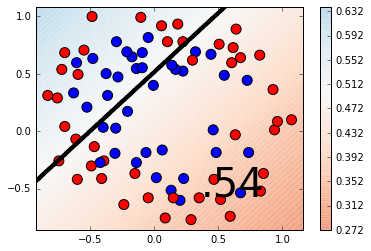

Train SCORE:  0.536585365854
Test SCORE:  0.472222222222
Orden:  2


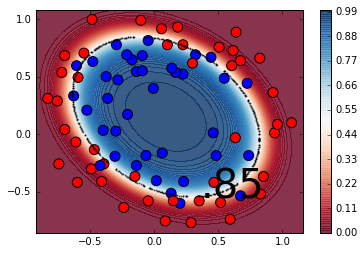

Train SCORE:  0.853658536585
Test SCORE:  0.805555555556
Orden:  3


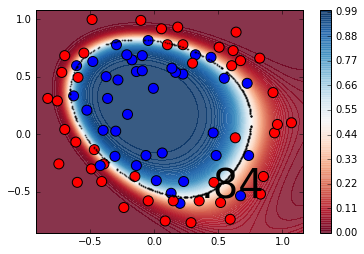

Train SCORE:  0.841463414634
Test SCORE:  0.805555555556
Orden:  4


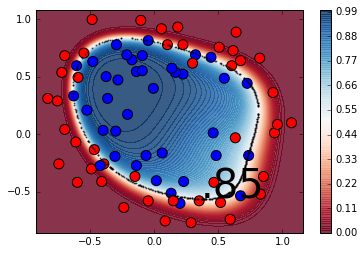

Train SCORE:  0.853658536585
Test SCORE:  0.861111111111
Orden:  5


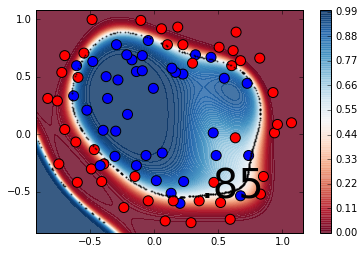

Train SCORE:  0.853658536585
Test SCORE:  0.805555555556
Orden:  6


C:\Users\Ariel\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


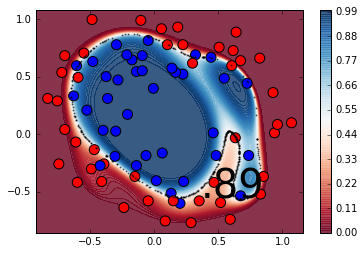

Train SCORE:  0.890243902439
Test SCORE:  0.75
Orden:  7


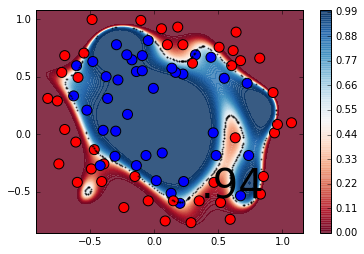

Train SCORE:  0.939024390244
Test SCORE:  0.722222222222
Orden:  8


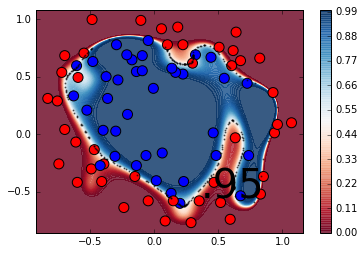

Train SCORE:  0.951219512195
Test SCORE:  0.638888888889
Orden:  9


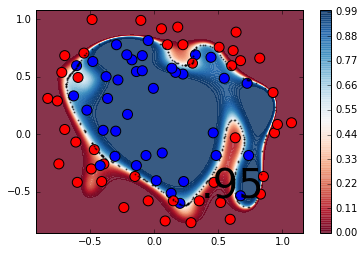

Train SCORE:  0.951219512195
Test SCORE:  0.666666666667
Orden:  10


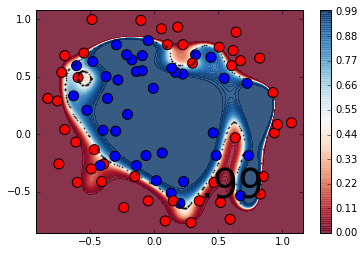

Train SCORE:  0.987804878049
Test SCORE:  0.638888888889
Orden:  11


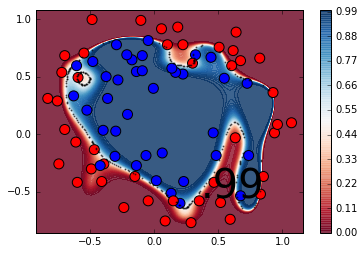

Train SCORE:  0.987804878049
Test SCORE:  0.638888888889
Orden:  12


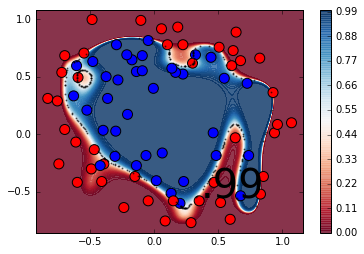

Train SCORE:  0.987804878049
Test SCORE:  0.638888888889
Orden:  13


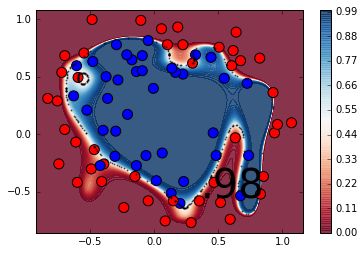

Train SCORE:  0.975609756098
Test SCORE:  0.666666666667
Orden:  14


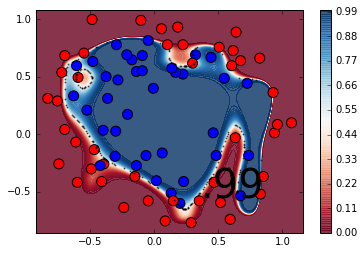

Train SCORE:  0.987804878049
Test SCORE:  0.638888888889
Orden:  15


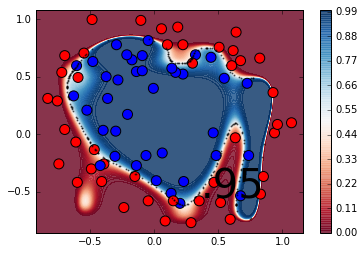

Train SCORE:  0.951219512195
Test SCORE:  0.666666666667
Orden:  16


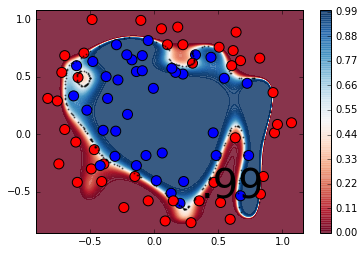

Train SCORE:  0.987804878049
Test SCORE:  0.638888888889
Orden:  17


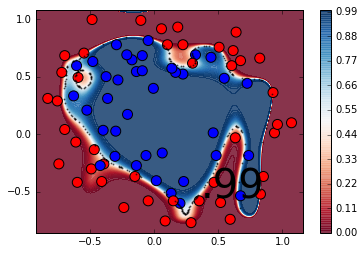

Train SCORE:  0.987804878049
Test SCORE:  0.611111111111
Orden:  18


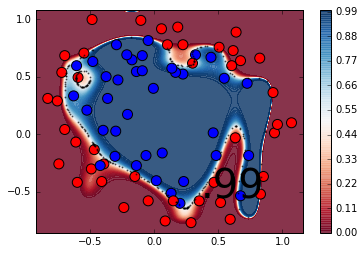

Train SCORE:  0.987804878049
Test SCORE:  0.611111111111
Orden:  19


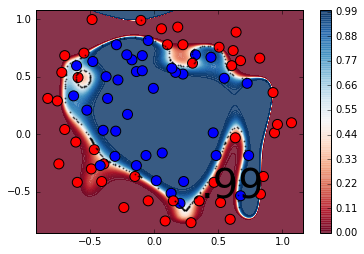

Train SCORE:  0.987804878049
Test SCORE:  0.611111111111
    Poly_order  Train_SCORE  Test_SCORE
0          1.0     0.536585    0.472222
1          2.0     0.853659    0.805556
2          3.0     0.841463    0.805556
3          4.0     0.853659    0.861111
4          5.0     0.853659    0.805556
5          6.0     0.890244    0.750000
6          7.0     0.939024    0.722222
7          8.0     0.951220    0.638889
8          9.0     0.951220    0.666667
9         10.0     0.987805    0.638889
10        11.0     0.987805    0.638889
11        12.0     0.987805    0.638889
12        13.0     0.975610    0.666667
13        14.0     0.987805    0.638889
14        15.0     0.951220    0.666667
15        16.0     0.987805    0.638889
16        17.0     0.987805    0.611111
17        18.0     0.987805    0.611111
18        19.0     0.987805    0.611111


In [9]:
# dataframe en el cual voy a guardar los resultados de cada modelo para comparar
resultados = pd.DataFrame(columns=['Poly_order','Train_SCORE','Test_SCORE'])

# Divido los sets en train y test
x_train, x_test, y_train, y_test = train_test_split(features_matrix,labels, test_size=0.3, random_state=42)

print('=================================================')
for degree in range(1,20):
    print('Orden: ', degree)
    pol_x_train = get_polynimial_set(x_train, degree=degree)

    clf=LogisticRegression(C=1000000)
    clf.fit(pol_x_train,y_train)
    plot_boundaries2(x_train,y_train,score=accuracy_score(y_train,clf.predict(pol_x_train)),probability_func=clf.predict_proba, degree=degree)
    plt.show()

    pol_x_test = get_polynimial_set(x_test, degree=degree)

    resultados = resultados.append({'Poly_order':degree,
                                    'Train_SCORE':accuracy_score(y_train,clf.predict(pol_x_train)),
                                    'Test_SCORE':accuracy_score(y_test,clf.predict(pol_x_test))
                                   },
                                  ignore_index=True)
    
    
    print('Train SCORE: ', accuracy_score(y_train,clf.predict(pol_x_train)))
    print('Test SCORE: ', accuracy_score(y_test,clf.predict(pol_x_test)))
    print('=================================================')
print(resultados)


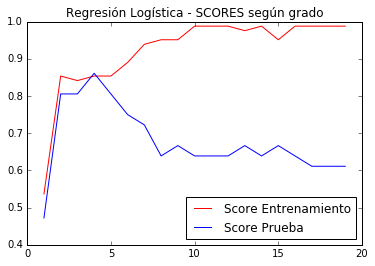

In [10]:
#results = results.append({'Degrees':K, 'Training_Scores':train_score, 'Testing_Scores':test_score}, ignore_index=True)
import matplotlib.pyplot as plt
#%matplotlib inline
plt.plot('Poly_order', 'Train_SCORE', data=resultados, color='Red', label='Score Entrenamiento')
plt.plot('Poly_order', 'Test_SCORE', data=resultados, color='Blue', label='Score Prueba')
plt.title('Regresión Logística - SCORES según grado')
plt.legend(loc="best")
plt.show()